Task 1

In [ ]:
import math
from collections import Counter, defaultdict

data = [
    {"Wine":1, "Price":"m", "Type":"w",  "Char":"a",  "Origin":"aaa", "Decision":"buy"},
    {"Wine":2, "Price":"e", "Type":"d",  "Char":"t",  "Origin":"am",  "Decision":"buy"},
    {"Wine":3, "Price":"e", "Type":"d",  "Char":"a",  "Origin":"am",  "Decision":"buy"},
    {"Wine":4, "Price":"m", "Type":"w",  "Char":"sw", "Origin":"am",  "Decision":"buy"},
    {"Wine":5, "Price":"m", "Type":"w",  "Char":"sw", "Origin":"eu",  "Decision":"buy"},
    {"Wine":6, "Price":"m", "Type":"d",  "Char":"t",  "Origin":"eu",  "Decision":"not"},
    {"Wine":7, "Price":"e", "Type":"sp", "Char":"a",  "Origin":"aaa", "Decision":"not"},
    {"Wine":8, "Price":"b", "Type":"r",  "Char":"t",  "Origin":"eu",  "Decision":"not"},
    {"Wine":9, "Price":"b", "Type":"d",  "Char":"a",  "Origin":"aaa", "Decision":"not"},
    {"Wine":10,"Price":"m", "Type":"d",  "Char":"b",  "Origin":"aaa", "Decision":"not"},
]

In [ ]:
def entropy(labels):
    counts = Counter(labels)
    total = len(labels)
    ent = 0.0
    for c in counts.values():
        p = c / total
        ent -= p * math.log2(p)
    return ent

parent_labels = [d["Decision"] for d in data]
parent_entropy = entropy(parent_labels)
print("Parent entropy:", parent_entropy)

Parent entropy: 1.0


In [ ]:
from collections import defaultdict

def split_by_attribute(data, attr):
    groups = defaultdict(list)
    for row in data:
        groups[row[attr]].append(row)
    return groups

groups_type = split_by_attribute(data, "Type")

for t, rows in groups_type.items():
    labels = [r["Decision"] for r in rows]
    print(t, len(rows), entropy(labels))

weighted_entropy = sum(
    (len(rows)/len(data)) * entropy([r["Decision"] for r in rows])
    for rows in groups_type.values()
)
info_gain_type = parent_entropy - weighted_entropy
print("Weighted entropy after split on Type:", weighted_entropy)
print("Information gain (Type):", info_gain_type)

w 3 0.0
d 5 0.9709505944546686
sp 1 0.0
r 1 0.0
Weighted entropy after split on Type: 0.4854752972273343
Information gain (Type): 0.5145247027726657


In [ ]:
type_d = [d for d in data if d["Type"] == "d"]
for row in type_d:
    print(row)

{'Wine': 2, 'Price': 'e', 'Type': 'd', 'Char': 't', 'Origin': 'am', 'Decision': 'buy'}
{'Wine': 3, 'Price': 'e', 'Type': 'd', 'Char': 'a', 'Origin': 'am', 'Decision': 'buy'}
{'Wine': 6, 'Price': 'm', 'Type': 'd', 'Char': 't', 'Origin': 'eu', 'Decision': 'not'}
{'Wine': 9, 'Price': 'b', 'Type': 'd', 'Char': 'a', 'Origin': 'aaa', 'Decision': 'not'}
{'Wine': 10, 'Price': 'm', 'Type': 'd', 'Char': 'b', 'Origin': 'aaa', 'Decision': 'not'}


In [ ]:
def info_gain(data_subset, attr, label_key="Decision"):
    labels = [d[label_key] for d in data_subset]
    base_ent = entropy(labels)
    groups = split_by_attribute(data_subset, attr)
    weighted_ent = sum(
        (len(rows)/len(data_subset)) * entropy([r[label_key] for r in rows])
        for rows in groups.values()
    )
    return base_ent - weighted_ent

for attr in ["Price", "Char", "Origin"]:
    print(attr, info_gain(type_d, attr))

Price 0.9709505944546686
Char 0.17095059445466854
Origin 0.9709505944546686


Task 2

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = np.array([
    [5.1, 3.5, 1.4, 0.2],
    [4.9, 3. , 1.4, 0.2],
    [4.7, 3.2, 1.3, 0.2],
    [4.6, 3.1, 1.5, 0.2],
    [5. , 3.6, 1.4, 0.2],
    [5.4, 3.9, 1.7, 0.4],
    [4.6, 3.4, 1.4, 0.3],
    [5. , 3.4, 1.5, 0.2],
    [4.4, 2.9, 1.4, 0.2],
    [4.9, 3.1, 1.5, 0.1],
    [5.4, 3.7, 1.5, 0.2],
    [4.8, 3.4, 1.6, 0.2],
    [4.8, 3. , 1.4, 0.1],
    [4.3, 3. , 1.1, 0.1],
    [5.8, 4. , 1.2, 0.2],
    [5.7, 4.4, 1.5, 0.4],
    [5.4, 3.9, 1.3, 0.4],
    [5.1, 3.5, 1.4, 0.3],
    [5.7, 3.8, 1.7, 0.3],
    [5.1, 3.8, 1.5, 0.3],
    [5.4, 3.4, 1.7, 0.2],
    [5.1, 3.7, 1.5, 0.4],
    [4.6, 3.6, 1. , 0.2],
    [5.1, 3.3, 1.7, 0.5],
    [4.8, 3.4, 1.9, 0.2],
    [5. , 3. , 1.6, 0.2],
    [5. , 3.4, 1.6, 0.4],
    [5.2, 3.5, 1.5, 0.2],
    [5.2, 3.4, 1.4, 0.2],
    [4.7, 3.2, 1.6, 0.2],
    [4.8, 3.1, 1.6, 0.2],
    [5.4, 3.4, 1.5, 0.4],
    [5.2, 4.1, 1.5, 0.1],
    [5.5, 4.2, 1.4, 0.2],
    [4.9, 3.1, 1.5, 0.2],
    [5. , 3.2, 1.2, 0.2],
    [5.5, 3.5, 1.3, 0.2],
    [4.9, 3.6, 1.4, 0.1],
    [4.4, 3. , 1.3, 0.2],
    [5.1, 3.4, 1.5, 0.2],
    [5. , 3.5, 1.3, 0.3],
    [4.5, 2.3, 1.3, 0.3],
    [4.4, 3.2, 1.3, 0.2],
    [5. , 3.5, 1.6, 0.6],
    [5.1, 3.8, 1.9, 0.4],
    [4.8, 3. , 1.4, 0.3],
    [5.1, 3.8, 1.6, 0.2],
    [4.6, 3.2, 1.4, 0.2],
    [5.3, 3.7, 1.5, 0.2],
    [5. , 3.3, 1.4, 0.2],
    [7. , 3.2, 4.7, 1.4],
    [6.4, 3.2, 4.5, 1.5],
    [6.9, 3.1, 4.9, 1.5],
    [5.5, 2.3, 4. , 1.3],
    [6.5, 2.8, 4.6, 1.5],
    [5.7, 2.8, 4.5, 1.3],
    [6.3, 3.3, 4.7, 1.6],
    [4.9, 2.4, 3.3, 1. ],
    [6.6, 2.9, 4.6, 1.3],
    [5.2, 2.7, 3.9, 1.4],
    [5. , 2. , 3.5, 1. ],
    [5.9, 3. , 4.2, 1.5],
    [6. , 2.2, 4. , 1. ],
    [6.1, 2.9, 4.7, 1.4],
    [5.6, 2.9, 3.6, 1.3],
    [6.7, 3.1, 4.4, 1.4],
    [5.6, 3. , 4.5, 1.5],
    [5.8, 2.7, 4.1, 1. ],
    [6.2, 2.2, 4.5, 1.5],
    [5.6, 2.5, 3.9, 1.1],
    [5.9, 3.2, 4.8, 1.8],
    [6.1, 2.8, 4. , 1.3],
    [6.3, 2.5, 4.9, 1.5],
    [6.1, 2.8, 4.7, 1.2],
    [6.4, 2.9, 4.3, 1.3],
    [6.6, 3. , 4.4, 1.4],
    [6.8, 2.8, 4.8, 1.4],
    [6.7, 3. , 5. , 1.7],
    [6. , 2.9, 4.5, 1.5],
    [5.7, 2.6, 3.5, 1. ],
    [5.5, 2.4, 3.8, 1.1],
    [5.5, 2.4, 3.7, 1. ],
    [5.8, 2.7, 3.9, 1.2],
    [6. , 2.7, 5.1, 1.6],
    [5.4, 3. , 4.5, 1.5],
    [6. , 3.4, 4.5, 1.6],
    [6.7, 3.1, 4.7, 1.5],
    [6.3, 2.3, 4.4, 1.3],
    [5.6, 3. , 4.1, 1.3],
    [5.5, 2.5, 4. , 1.3],
    [5.5, 2.6, 4.4, 1.2],
    [6.1, 3. , 4.6, 1.4],
    [5.8, 2.6, 4. , 1.2],
    [5. , 2.3, 3.3, 1. ],
    [5.6, 2.7, 4.2, 1.3],
    [5.7, 3. , 4.2, 1.2],
    [5.7, 2.9, 4.2, 1.3],
    [6.2, 2.9, 4.3, 1.3],
    [5.1, 2.5, 3. , 1.1],
    [5.7, 2.8, 4.1, 1.3],
    [6.3, 3.3, 6. , 2.5],
    [5.8, 2.7, 5.1, 1.9],
    [7.1, 3. , 5.9, 2.1],
    [6.3, 2.9, 5.6, 1.8],
    [6.5, 3. , 5.8, 2.2],
    [7.6, 3. , 6.6, 2.1],
    [4.9, 2.5, 4.5, 1.7],
    [7.3, 2.9, 6.3, 1.8],
    [6.7, 2.5, 5.8, 1.8],
    [7.2, 3.6, 6.1, 2.5],
    [6.5, 3.2, 5.1, 2. ],
    [6.4, 2.7, 5.3, 1.9],
    [6.8, 3. , 5.5, 2.1],
    [5.7, 2.5, 5. , 2. ],
    [5.8, 2.8, 5.1, 2.4],
    [6.4, 3.2, 5.3, 2.3],
    [6.5, 3. , 5.5, 1.8],
    [7.7, 3.8, 6.7, 2.2],
    [7.7, 2.6, 6.9, 2.3],
    [6. , 2.2, 5. , 1.5],
    [6.9, 3.2, 5.7, 2.3],
    [5.6, 2.8, 4.9, 2. ],
    [7.7, 2.8, 6.7, 2. ],
    [6.3, 2.7, 4.9, 1.8],
    [6.7, 3.3, 5.7, 2.1],
    [7.2, 3.2, 6. , 1.8],
    [6.2, 2.8, 4.8, 1.8],
    [6.1, 3. , 4.9, 1.8],
    [6.4, 2.8, 5.6, 2.1],
    [7.2, 3. , 5.8, 1.6],
    [7.4, 2.8, 6.1, 1.9],
    [7.9, 3.8, 6.4, 2. ],
    [6.4, 2.8, 5.6, 2.2],
    [6.3, 2.8, 5.1, 1.5],
    [6.1, 2.6, 5.6, 1.4],
    [7.7, 3. , 6.1, 2.3],
    [6.3, 3.4, 5.6, 2.4],
    [6.4, 3.1, 5.5, 1.8],
    [6. , 3. , 4.8, 1.8],
    [6.9, 3.1, 5.4, 2.1],
    [6.7, 3.1, 5.6, 2.4],
    [6.9, 3.1, 5.1, 2.3],
    [5.8, 2.7, 5.1, 1.9],
    [6.8, 3.2, 5.9, 2.3],
    [6.7, 3.3, 5.7, 2.5],
    [6.7, 3. , 5.2, 2.3],
    [6.3, 2.5, 5. , 1.9],
    [6.5, 3. , 5.2, 2. ],
    [6.2, 3.4, 5.4, 2.3],
    [5.9, 3. , 5.1, 1.8]
])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

print("Cluster centers:\n", centers)
print("Cluster sizes:", np.bincount(labels))

sil_score = silhouette_score(X, labels)
print("Silhouette score:", sil_score)

Cluster centers:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Cluster sizes: [62 50 38]
Silhouette score: 0.5528190123564095


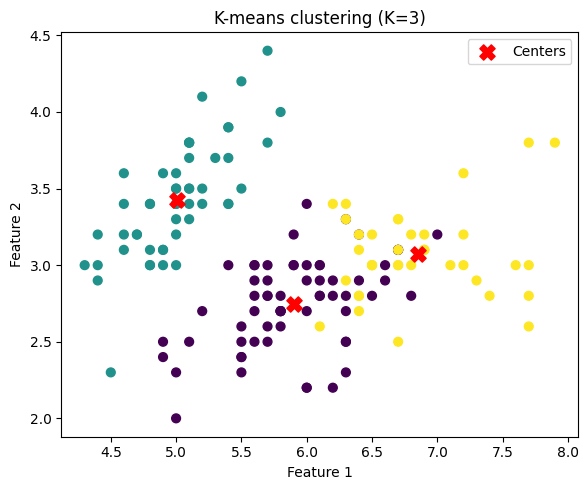

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=40)
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=120, marker="X", label="Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-means clustering (K=3)")
plt.legend()
plt.tight_layout()
plt.show()

Task 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Task3_Data_Process.csv")
print(df.head())
print(df.describe())

x = df["x"].values.reshape(-1, 1)
y = df["y"].values

          x         y
0  0.287578  1.164440
1  0.788305 -0.887802
2  0.408977  0.174131
3  0.883017 -0.217437
4  0.940467 -0.076454
               x          y
count  25.000000  25.000000
mean    0.595560  -0.237362
std     0.300524   0.683736
min     0.042060  -1.959128
25%     0.408977  -0.647906
50%     0.640507  -0.393132
75%     0.889539   0.174131
max     0.994270   1.239426


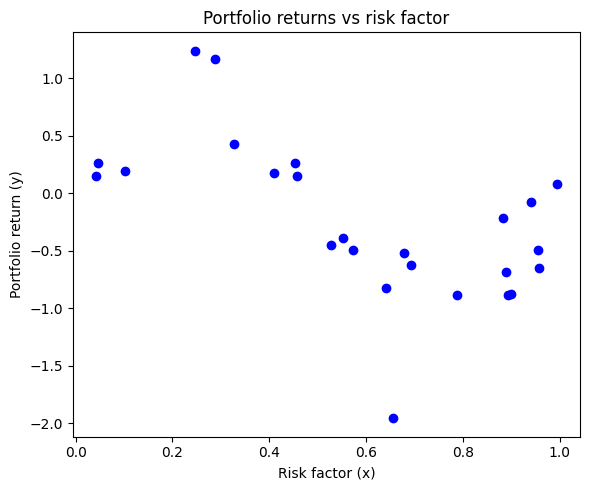

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(x, y, color="blue")
plt.xlabel("Risk factor (x)")
plt.ylabel("Portfolio return (y)")
plt.title("Portfolio returns vs risk factor")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def fit_poly_degree(degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return model, poly, y_pred, mse, r2

for d in [1, 2, 3]:
    model, poly, y_pred, mse, r2 = fit_poly_degree(d)
    print(f"Degree {d}: MSE={mse:.4f}, R^2={r2:.4f}")

Degree 1: MSE=0.2950, R^2=0.3427
Degree 2: MSE=0.2824, R^2=0.3708
Degree 3: MSE=0.1125, R^2=0.7492


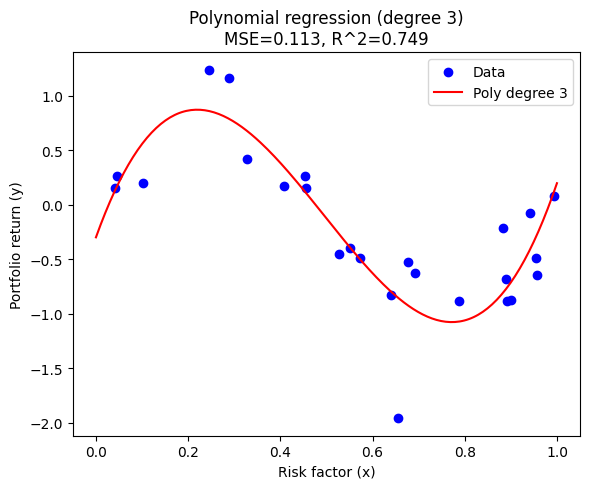

In [ ]:

degree = 3
model, poly, y_pred, mse, r2 = fit_poly_degree(degree)

x_plot = np.linspace(0, 1, 200).reshape(-1, 1)
X_plot_poly = poly.transform(x_plot)
y_plot = model.predict(X_plot_poly)

plt.figure(figsize=(6, 5))
plt.scatter(x, y, color="blue", label="Data")
plt.plot(x_plot, y_plot, color="red", label=f"Poly degree {degree}")
plt.xlabel("Risk factor (x)")
plt.ylabel("Portfolio return (y)")
plt.title(f"Polynomial regression (degree {degree})\nMSE={mse:.3f}, R^2={r2:.3f}")
plt.legend()
plt.tight_layout()
plt.show()